In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Temporal Series - Daily Cases (new and accumulated)

In [2]:
df_cases = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_cases.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_cases = df_cases.groupby(['Country/Region']).sum()
df_cases = df_cases.transpose()
df_cases.index.name = 'date'
df_cases.index = pd.to_datetime(df_cases.index)
df_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2021-01-14,53775,65994,103127,8868,18613,184,1770715,163576,28669,389260,...,3269757,29989,77777,1,118415,1531,150505,2110,32800,25368
2021-01-15,53831,66635,103381,8946,18679,184,1783047,163972,28689,390788,...,3325642,30946,77904,1,118856,1536,151142,2111,34278,26109
2021-01-16,53938,67216,103611,9038,18765,187,1791979,164235,28708,392511,...,3367070,31669,77968,1,119306,1537,151569,2112,36074,26881
2021-01-17,53984,67690,103833,9083,18875,189,1799243,164586,28721,393778,...,3405740,32378,77968,1,119803,1537,152031,2112,37605,27203
2021-01-18,54062,67982,104092,9083,18926,189,1807428,164676,28731,394939,...,3443350,32863,78036,1,120444,1539,152555,2113,38207,27892


In [3]:
df_daily_cases = df_cases.sub(df_cases.shift())
df_daily_cases.iloc[0] = df_cases.iloc[0]
df_daily_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2021-01-14,191.0,660.0,267.0,50.0,188.0,8.0,13286.0,448.0,9.0,3510.0,...,48804.0,1514.0,61.0,0.0,604.0,10.0,736.0,1.0,1700.0,1112.0
2021-01-15,56.0,641.0,254.0,78.0,66.0,0.0,12332.0,396.0,20.0,1528.0,...,55885.0,957.0,127.0,0.0,441.0,5.0,637.0,1.0,1478.0,741.0
2021-01-16,107.0,581.0,230.0,92.0,86.0,3.0,8932.0,263.0,19.0,1723.0,...,41428.0,723.0,64.0,0.0,450.0,1.0,427.0,1.0,1796.0,772.0
2021-01-17,46.0,474.0,222.0,45.0,110.0,2.0,7264.0,351.0,13.0,1267.0,...,38670.0,709.0,0.0,0.0,497.0,0.0,462.0,0.0,1531.0,322.0
2021-01-18,78.0,292.0,259.0,0.0,51.0,0.0,8185.0,90.0,10.0,1161.0,...,37610.0,485.0,68.0,0.0,641.0,2.0,524.0,1.0,602.0,689.0


#### Countries with the biggest numbers of cases in the last day

In [4]:
df_daily_cases.tail().iloc[-1].nlargest(20)

Country/Region
US                141999.0
Spain              84287.0
United Kingdom     37610.0
Brazil             23671.0
Russia             22509.0
Colombia           14719.0
India              10050.0
Germany             9253.0
Indonesia           9086.0
South Africa        9010.0
Italy               8825.0
Argentina           8185.0
Mexico              8074.0
Portugal            6702.0
Israel              6560.0
Canada              6420.0
Turkey              5862.0
Iran                5806.0
Japan               4890.0
Netherlands         4792.0
Name: 2021-01-18 00:00:00, dtype: float64

In [5]:
countries_observed = ["US", 
                      "Brazil", 
                      "Austria", 
                      "Spain",
                      "France",
                      #"Portugal",
                      "Russia",
                      #"China",
                      "India",
                      "Italy",
                     ]

### New Cases (moving average, 7 days)

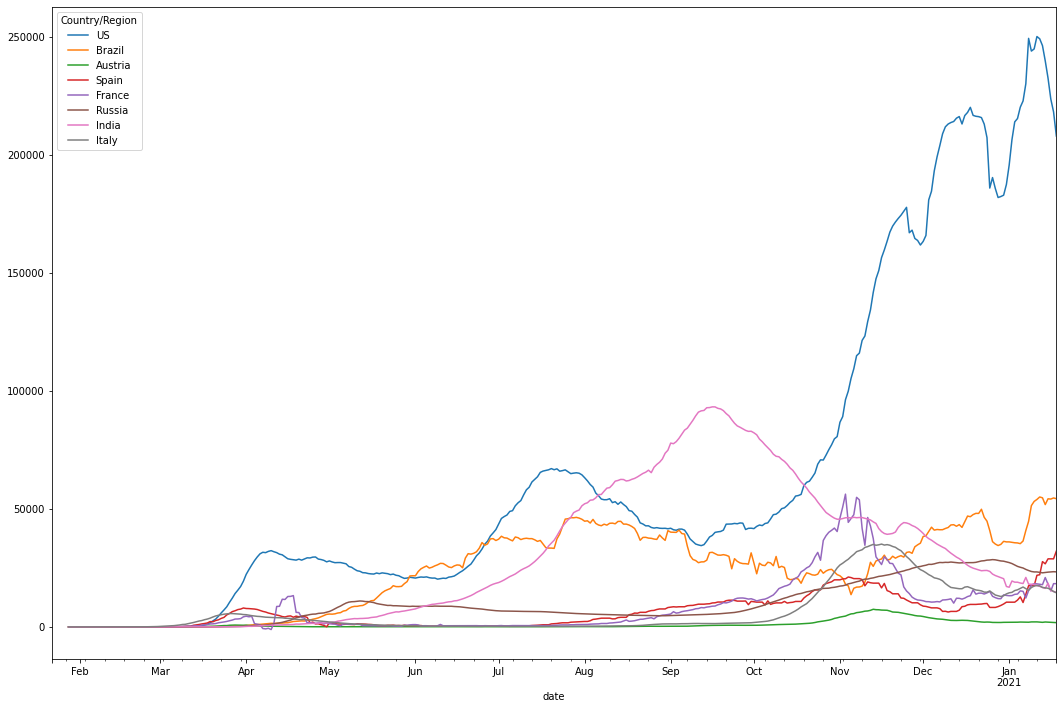

In [6]:
df_daily_cases[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Cases (log)

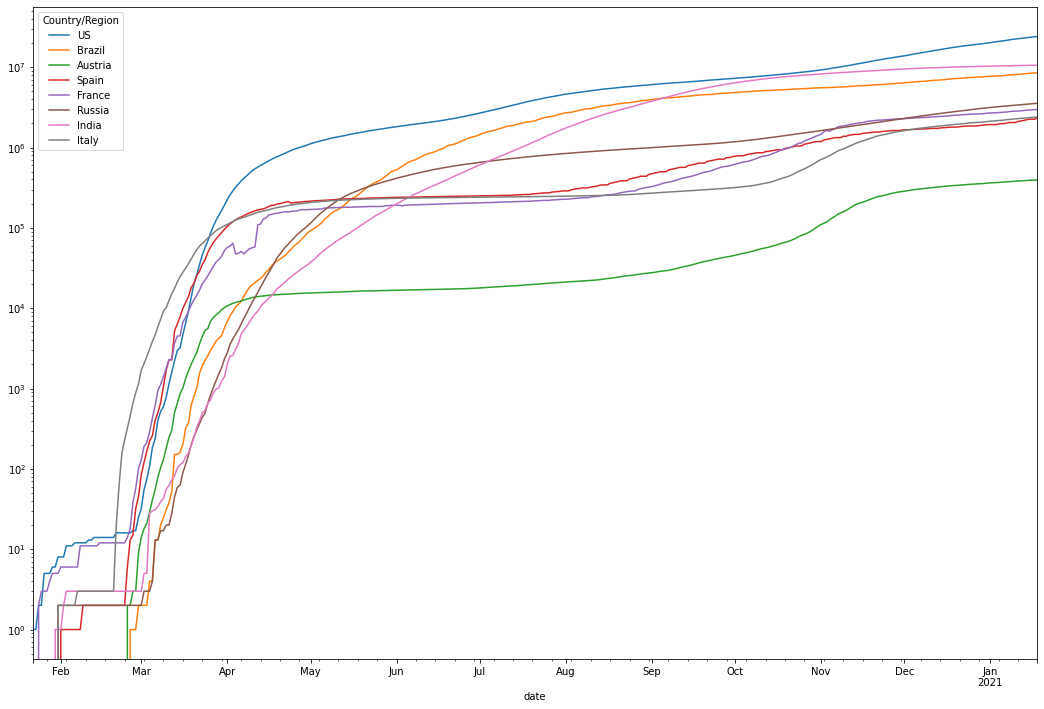

In [7]:
df_cases[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Deaths (new and accumulated)

In [8]:
df_deaths = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_deaths.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_deaths = df_deaths.groupby(['Country/Region']).sum()
df_deaths = df_deaths.transpose()
df_deaths.index.name = 'date'
df_deaths.index = pd.to_datetime(df_deaths.index)
df_deaths.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2021-01-14,2314,1261,2822,88,425,6,45125,2963,909,6921,...,86163,280,618,0,1090,35,1665,612,514,636
2021-01-15,2324,1265,2827,88,428,6,45227,2974,909,6987,...,87448,291,619,0,1095,35,1687,612,527,666
2021-01-16,2336,1270,2831,91,431,6,45295,2987,909,7053,...,88747,298,619,0,1101,35,1700,612,537,683
2021-01-17,2339,1277,2836,91,436,6,45407,2992,909,7082,...,89429,311,619,0,1106,35,1718,612,546,713
2021-01-18,2343,1281,2840,91,439,6,45832,2998,909,7122,...,90031,319,619,0,1112,35,1726,612,559,773


#### Countries with the biggest numbers of deaths in the last day

In [9]:
df_daily_deaths = df_deaths.sub(df_deaths.shift())
df_daily_deaths.iloc[0] = df_deaths.iloc[0]
df_daily_deaths.tail().iloc[-1].nlargest(15)

Country/Region
US                1403.0
United Kingdom     602.0
Mexico             544.0
Russia             458.0
Spain              455.0
Brazil             452.0
Argentina          425.0
France             404.0
Italy              377.0
Colombia           373.0
Germany            362.0
South Africa       344.0
Indonesia          295.0
Portugal           167.0
Turkey             164.0
Name: 2021-01-18 00:00:00, dtype: float64

#### Countries with the biggest numbers of deaths

In [10]:
df_deaths.tail().iloc[-1].nlargest(15)

Country/Region
US                399003
Brazil            210299
India             152556
Mexico            141248
United Kingdom     90031
Italy              82554
France             70826
Russia             65059
Iran               56886
Spain              53769
Colombia           49004
Germany            47263
Argentina          45832
Peru               38770
South Africa       37449
Name: 2021-01-18 00:00:00, dtype: int64

In [11]:
df_daily_deaths = df_deaths.sub(df_deaths.shift())
df_daily_deaths.iloc[0] = df_deaths.iloc[0]
df_daily_deaths[countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2021-01-14,3929.0,1131.0,53.0,201.0,284.0,553.0,191.0,522.0
2021-01-15,3802.0,1151.0,66.0,235.0,638.0,542.0,175.0,477.0
2021-01-16,3352.0,1050.0,66.0,0.0,3.0,576.0,181.0,475.0
2021-01-17,1749.0,551.0,29.0,0.0,329.0,467.0,145.0,377.0
2021-01-18,1403.0,452.0,40.0,455.0,404.0,458.0,137.0,377.0


### New Deaths (moving average, 7 days)

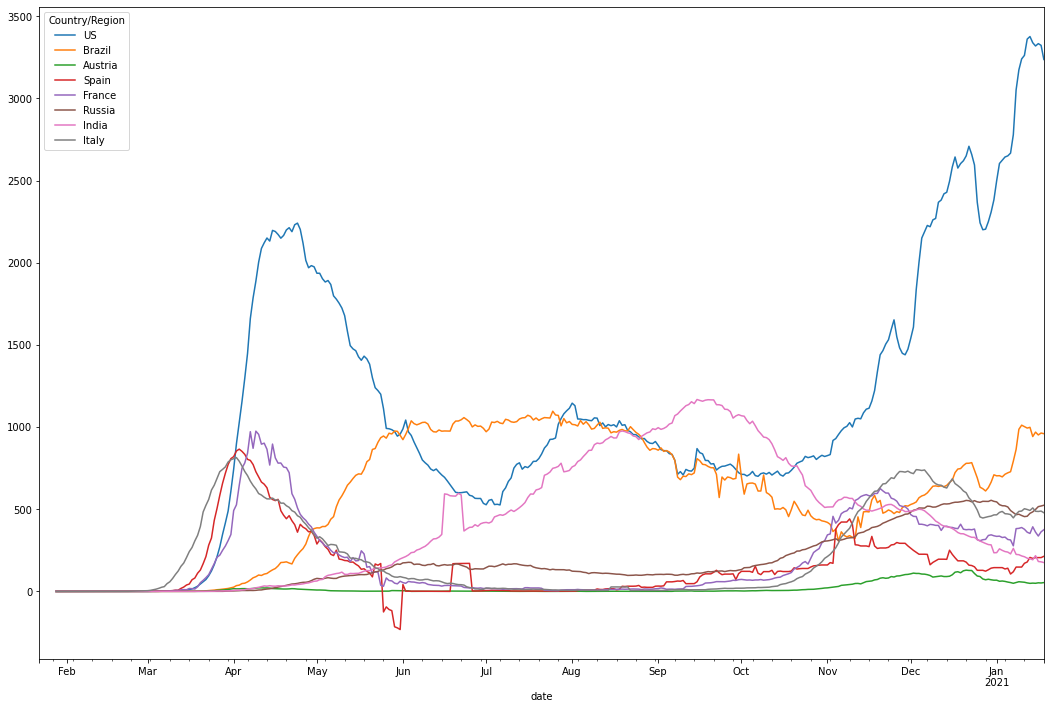

In [12]:
df_daily_deaths[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Deaths (log)

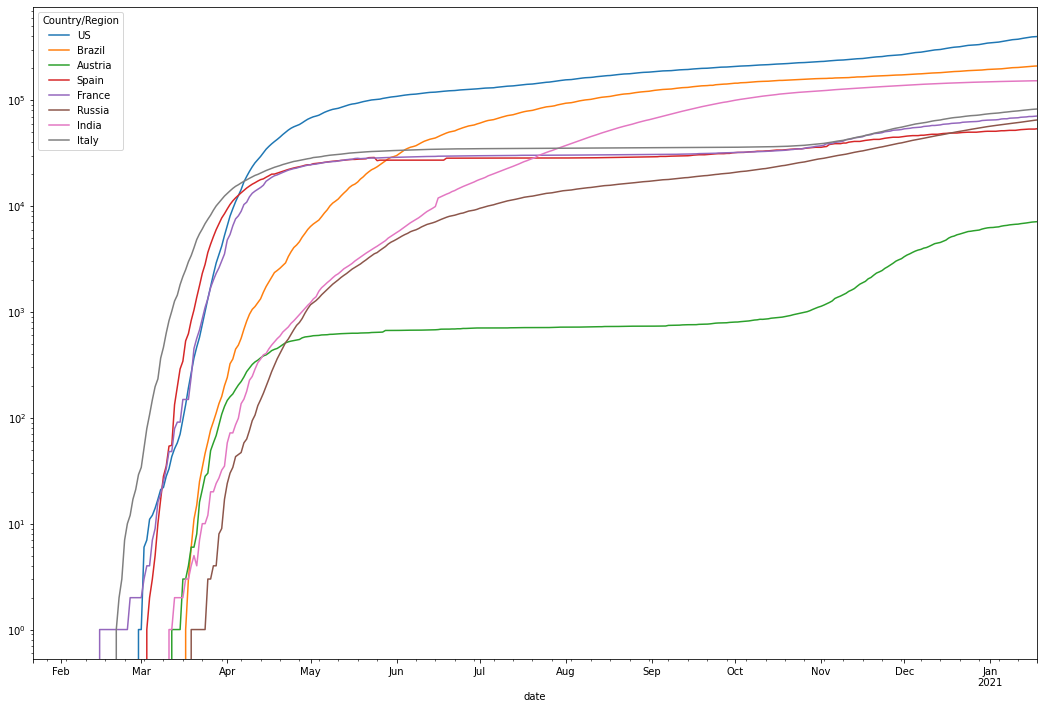

In [13]:
df_deaths[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered (new and accumulated)

In [14]:
df_recovered = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_recovered.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.transpose()
df_recovered.index.name = 'date'
df_recovered.index = pd.to_datetime(df_recovered.index)

# fixing error in the original series
df_recovered.loc["2020-03-17","Austria"] = 8 
df_recovered.loc["2020-02-23","Italy"] = 1

df_recovered.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_daily_recovered = df_recovered.sub(df_recovered.shift())
df_daily_recovered.iloc[0] = df_recovered.iloc[0]
df_daily_recovered[countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2021-01-14,0.0,47659.0,3239.0,0.0,1130.0,27497.0,15975.0,20115.0
2021-01-15,0.0,43336.0,2283.0,0.0,1269.0,27345.0,16977.0,18979.0
2021-01-16,0.0,47748.0,2571.0,0.0,0.0,26890.0,17170.0,16186.0
2021-01-17,0.0,23186.0,1433.0,0.0,1272.0,23283.0,14457.0,16510.0
2021-01-18,0.0,51451.0,1647.0,0.0,860.0,18224.0,17411.0,14763.0


### New Recovered (moving average, 7 days)

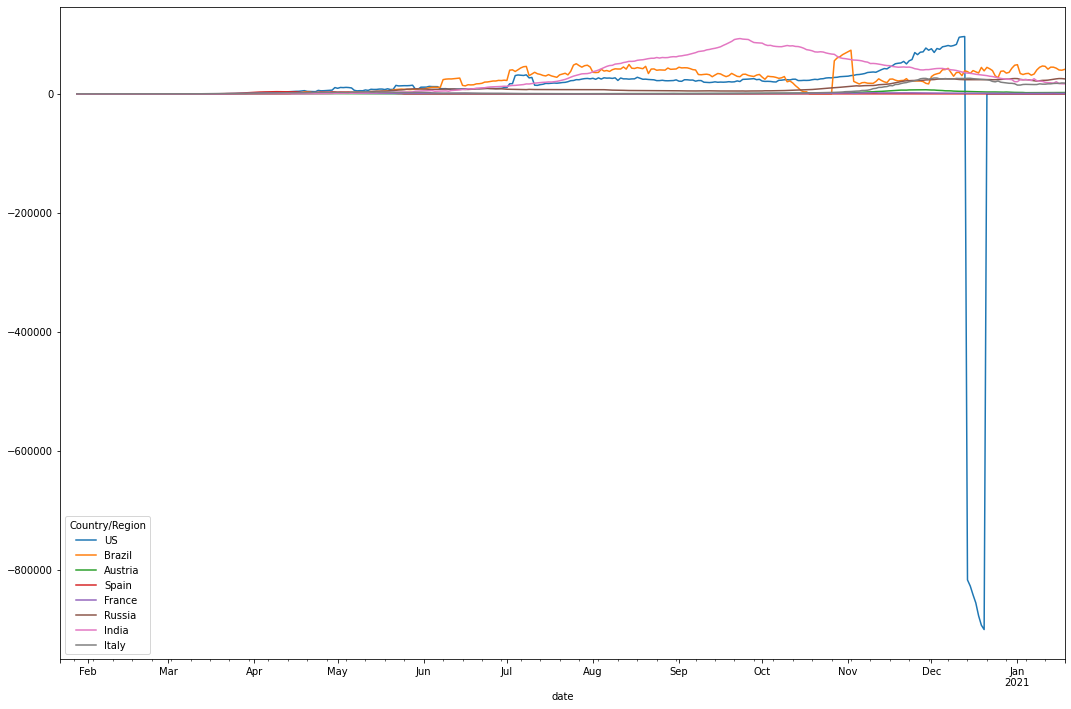

In [16]:
df_daily_recovered[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Recovered (log)

In [17]:
df_recovered.loc["2020-02-23","Italy"] = 1

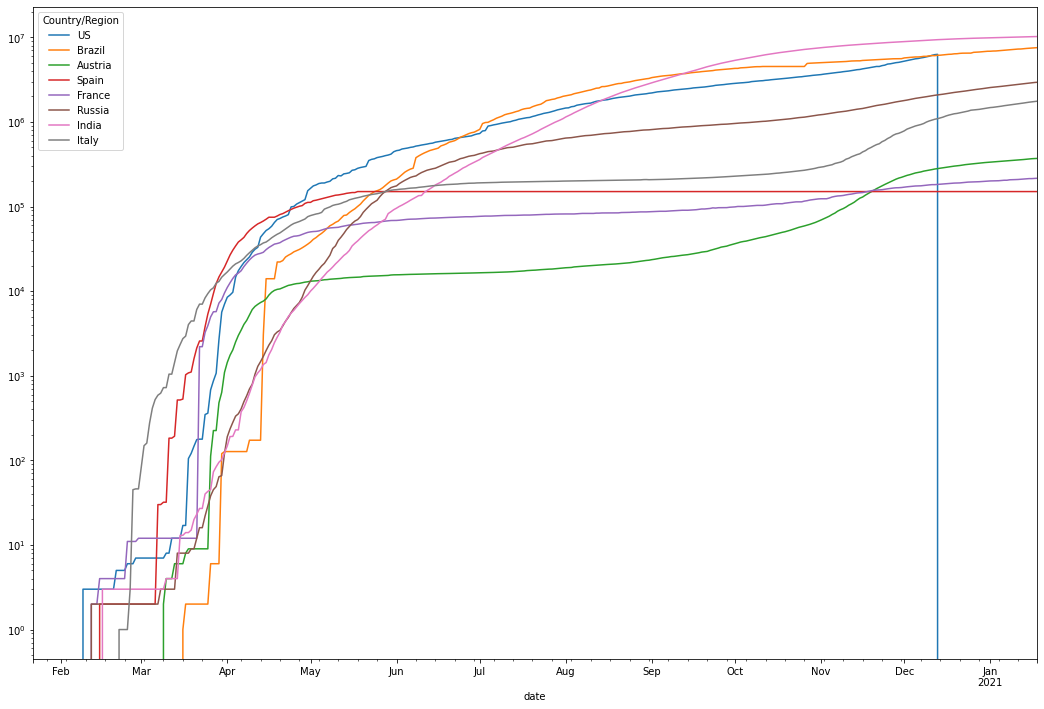

In [18]:
df_recovered[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

### Retrieving population data to explore COVID-19 data per inhabitant

In [19]:
## https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059

#import requests
#import lxml.html as lh
#url = 'https://www.worldometers.info/world-population/population-by-country/'

In [20]:
##Create a handle, page, to handle the contents of the website
#page = requests.get(url) #Store the contents of the website under doc
#doc = lh.fromstring(page.content) #Parse data that are stored between <tr>..</tr> of HTML

In [21]:
##Check the length of the first 12 rows
#tr_elements = doc.xpath('//tr')
#[len(T) for T in tr_elements[:12]]

In [22]:
#tr_elements = doc.xpath('//tr') #Create empty list
#col = []
#i = 0 #For each row, store each first element (header) and an empty list
#for t in tr_elements[0]:
#    i += 1
#    name = t.text_content()
#    print('%d:"%s"'%(i,name))
#    col.append((name,[]))

In [23]:
##Since out first row is the header, data is stored on the second row onwards
#for j in range(1,len(tr_elements)):
#    #T is our j'th row
#    T = tr_elements[j]
#    #If row is not of same size, the //tr data is not from our table 
#    if len(T) != len(tr_elements[0]):
#        break
#    
#    #i is the index of our column
#    i = 0
#    
#    #Iterate through each element of the row
#    for t in T.iterchildren():
#        data = t.text_content() 
#        #Check if row is empty
#        if i > 0:
#        #Convert any numerical value to integers
#            try:
#                data = int(data)
#            except:
#                pass
#        #Append the data to the empty list of the i'th column
#        col[i][1].append(data)
#        #Increment i for the next column
#        i += 1

In [24]:
##Check the length of the columns
#[len(C) for (title,C) in col]

In [25]:
#wp_dict = {title:column for (title,column) in col}
#df_wp = pd.DataFrame(wp_dict)
#df_wp["Population (2020)"] = df_wp["Population (2020)"].str.replace(',', '').astype(float)

In [26]:
#with open("./df_wp.pkl", "wb") as f:
#    pickle.dump(df_wp, f)

In [27]:
with open("./df_wp.pkl", "rb") as f:
    df_wp = pickle.load(f)

In [28]:
df_wp.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1.439324e+09,0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,1.380004e+09,0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,3.310027e+08,0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,2.735236e+08,1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,2.208923e+08,2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [29]:
df_wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        235 non-null    object 
 1   Country (or dependency)  235 non-null    object 
 2   Population (2020)        234 non-null    float64
 3   Yearly Change            235 non-null    object 
 4   Net Change               235 non-null    object 
 5   Density (P/Km²)          235 non-null    object 
 6   Land Area (Km²)          235 non-null    object 
 7   Migrants (net)           235 non-null    object 
 8   Fert. Rate               235 non-null    object 
 9   Med. Age                 235 non-null    object 
 10  Urban Pop %              235 non-null    object 
 11  World Share              235 non-null    object 
dtypes: float64(1), object(11)
memory usage: 22.2+ KB


In [30]:
# Aligninig names of countries (e.g US and United States)
df_wp.loc[2, 'Country (or dependency)'] = 'US'
cop = df_wp.loc[df_wp["Country (or dependency)"].isin(countries_observed)][["Country (or dependency)",
                                                                            "Population (2020)"]]
cop

,Country (or dependency),Population (2020)
1,India,1.380004e+09
2,US,3.310027e+08
5,Brazil,2.125594e+08
8,Russia,1.459345e+08
21,France,6.527351e+07
22,Italy,6.046183e+07
29,Spain,4.675478e+07
96,Austria,9.006398e+06


In [31]:
pops = []
for country in countries_observed:
    p = cop[cop['Country (or dependency)'] == country]['Population (2020)'].values[0]
    pops.append(p)

## Temporal Series - Cumulative Cases per Population

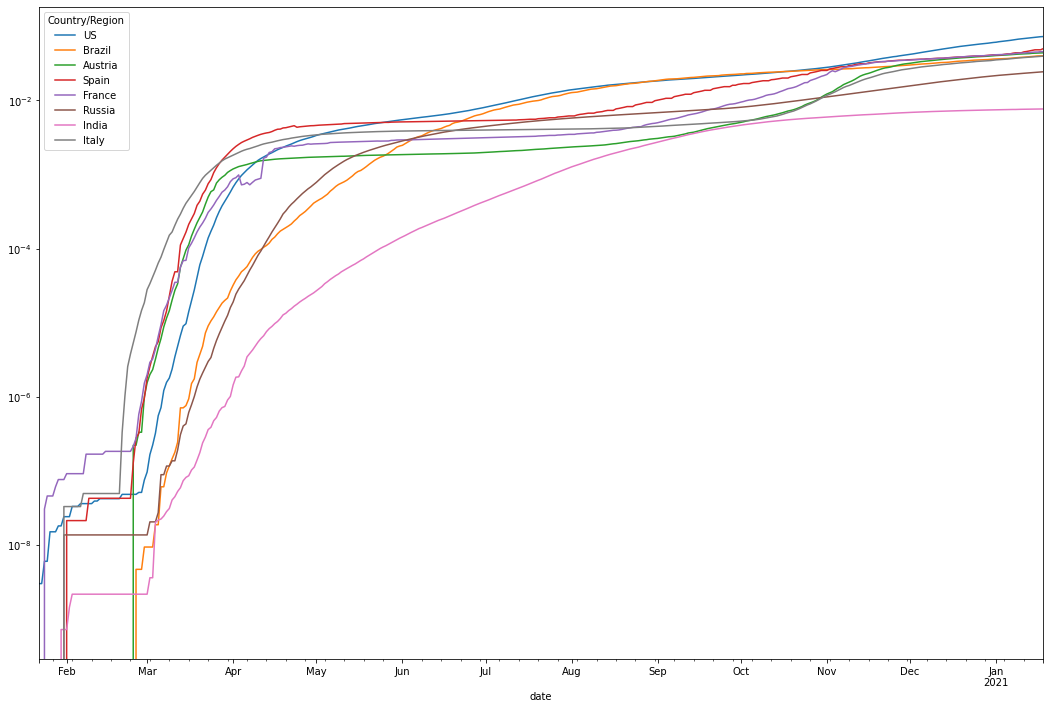

In [32]:
df_cases[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Cumulative Deaths per Population

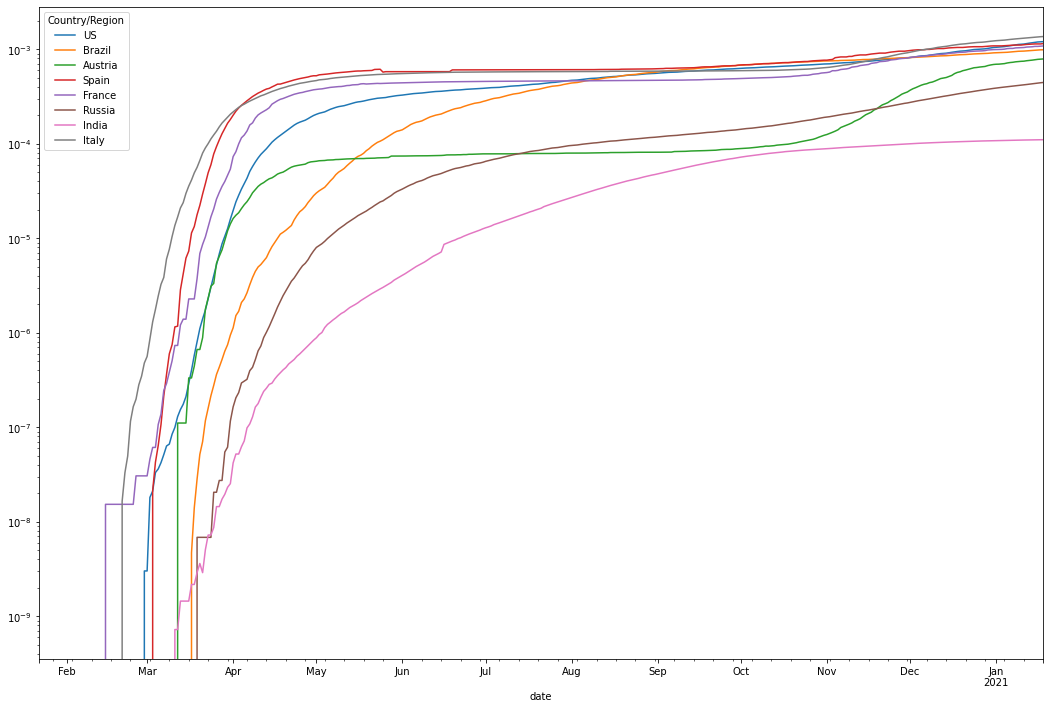

In [33]:
df_deaths[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered per Population

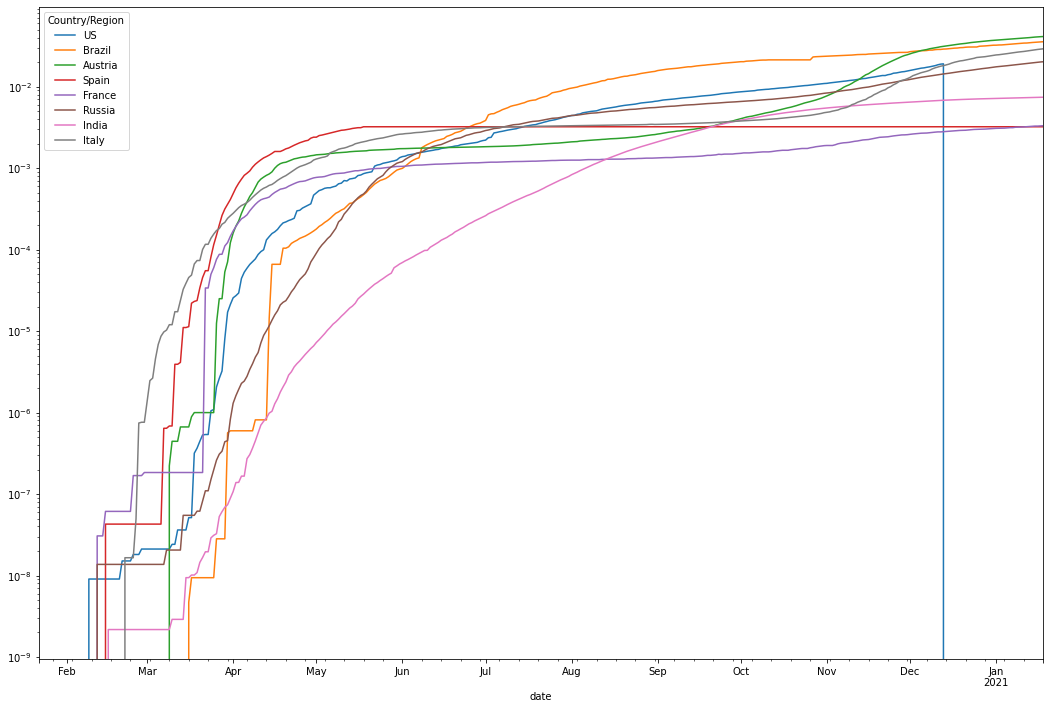

In [34]:
df_recovered[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

### Deaths / cases ratio

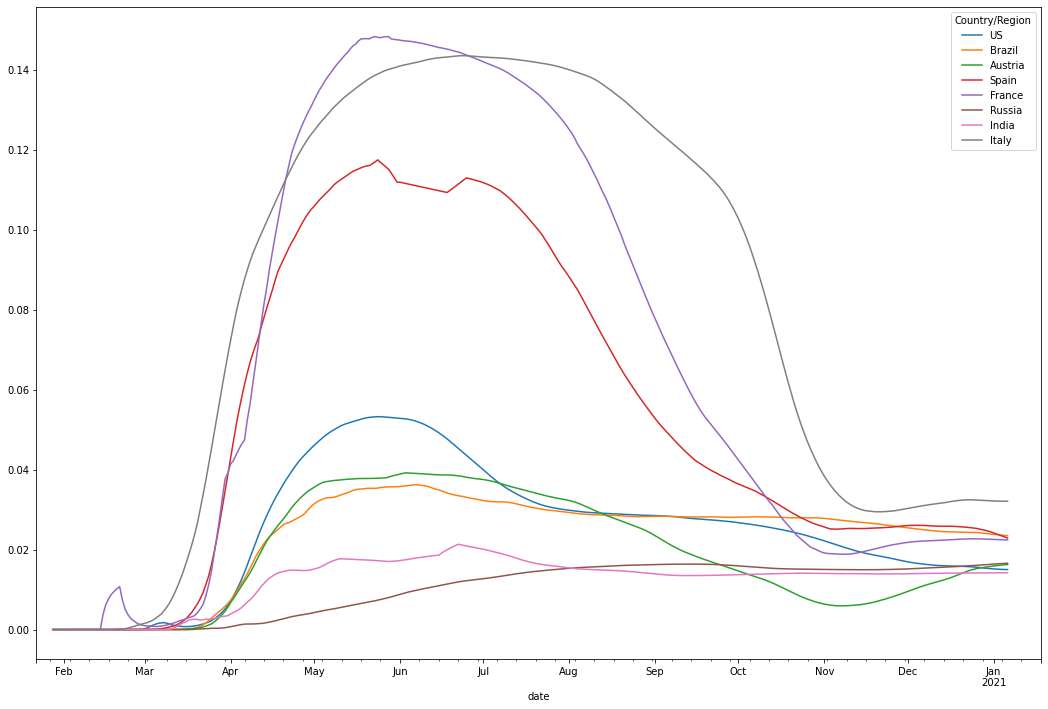

In [35]:
ratio = df_deaths/df_cases.shift(-12)
ratio[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()